<a href="https://colab.research.google.com/github/manthanthakker/BitcoinPrediction/blob/master/RedditScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generic Reddit Scraper** 

We are going to scrape reddit today. Since we are trying to analyze the sentiments for finanicial data, we are scraping a specific subreddit in this example, you can use this for any other subrredit too. 

We will be using the Praw Library to parse Reddit. Please refer the documentation for more details: https://praw.readthedocs.io/en/latest/code_overview/ Alternatively, please have your own secrets.

You can find the instructions to create a secret on [Github Repo](https://github.com/JosephLai241/Universal-Reddit-Scraper) in 
**How to get Reddit API Credentials.** 
Lets start the fun!


In [0]:
!pip install praw

Necessary Imports

In [0]:
import argparse
import sys
import praw
from prawcore import NotFound, PrawcoreException
import csv
import json
import datetime as dt
import pandas as pd

Initialize your reddit secret developer keys here

In [0]:
c_id = ""               # Personal Use Script (14 char)
c_secret = ""           # Secret key (27 char)
u_a = ""               # App name
usrnm = ""      # Reddit username
passwd = ""     # Reddit login password

Lets login to reddit using the secret token key:

In [0]:
reddit = praw.Reddit(client_id = c_id, 
                         client_secret = c_secret, 
                         user_agent = u_a, 
                         username = usrnm, 
                         password = passwd)

We will be scraping the wallstreetbets for financial posts and comments, you can simply replace any subreddit here and the code should work for you.

In [0]:
yoursubbreddit='wallstreetbets'
subbreddit=reddit.subreddit('wallstreetbets')

So the way it works with reddit is, There are multiple subrredits, consider like forums, for us its r/wallstreetbets. Inside each subrredit, there are posts made by users and each post has nested comments.

In summary the structure:

Reddit -> Subreddits (r/wallstreetbets) -> posts -> comments -> comments/MutiComments

Okay, so now we will fetch some top posts in the subreddit and parse all the nested comments and populate our dataframe (commentData)

In [0]:
commentsColumns=[
  'total_awards_received ',
 'approved_at_utc ',
 'author_flair_template_id ',
 'likes ',
 'user_reports ',
 'saved ',
 'id ',
 'banned_at_utc ',
 'mod_reason_title ',
 'gilded ',
 'archived ',
 'no_follow ',
 'author ',
 'score ',
 'author_fullname ',
 'report_reasons ',
 'approved_by ',
 'all_awardings ',
 'subreddit_id ',
 'body ',
 'edited ',
 'author_flair_css_class ',
 'is_submitter ',
 'downs ',
 'author_flair_richtext ',
 'subreddit ',
 'author_flair_text_color ',
 'score_hidden ',
 'permalink ',
 'num_reports ',
 'locked ',
 'name ',
 'created ',
 'author_flair_text ',
 'collapsed ',
 'created_utc ',
 'subreddit_name_prefixed ',
 'controversiality ']

##removing spaces 
commentColumns= [c.strip() for c in commentsColumns]

In [0]:
print(commentColumns)

['total_awards_received', 'approved_at_utc', 'author_flair_template_id', 'likes', 'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'no_follow', 'author', 'score', 'author_fullname', 'report_reasons', 'approved_by', 'all_awardings', 'subreddit_id', 'body', 'edited', 'author_flair_css_class', 'is_submitter', 'downs', 'author_flair_richtext', 'subreddit', 'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 'locked', 'name', 'created', 'author_flair_text', 'collapsed', 'created_utc', 'subreddit_name_prefixed', 'controversiality']


Once we have the subrredit object we can get hold of the top/hot posts and limit by a limit parameters across time horizon of day/week/monthly/yearly

After that, we fetch all the comments and populate the dataframe with all columns from the commment Object to dataframe. 

In [0]:
topPosts=subbreddit.top(limit=1,time_filter='day')
totalPosts=0
totalComments=0
badData=0
commentsData=pd.DataFrame(columns=commentColumns)
for post in topPosts:
  totalPosts=totalPosts+1
  print("POST TITTLE")
  print(post.title)
  post.comments.replace_more(limit=None)
  title=post.title
  for comment in post.comments.list():
    try:
      if(type(comment) == praw.models.reddit.comment.Comment):
          totalComments=totalComments+1
          tempList=[getattr(comment,j.strip()) for j in commentColumns] +[title]
          commentsData=commentsData.append(pd.DataFrame([tempList], columns = commentColumns+ ['Title']))
    except:
      badData=badData+1
      
        
print("Total Posts parsed", totalPosts)
print("TotalComments Parse across Posts", totalComments)
print("Deserialization Failed for some Object. Dirty Data etc", badData)     

POST TITTLE
German state finance minister committed suicide.


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Total Posts parsed 1
TotalComments Parse across Posts 1423
Deserialization Failed for some Object. Dirty Data etc 16


In [0]:
commentsData.to_csv('DailyTopPostsComments.csv')

In [0]:
commentsData

,Title,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,banned_at_utc,body,collapsed,controversiality,created,created_utc,downs,edited,gilded,id,is_submitter,likes,locked,mod_reason_title,name,no_follow,num_reports,permalink,report_reasons,saved,score,score_hidden,subreddit,subreddit_id,subreddit_name_prefixed,total_awards_received,user_reports
0,German state finance minister committed suicide.,[],None,None,False,Devianted90,None,[],None,None,None,t2_4nmq04fq,None,He was a STATE finance minister. The state of ...,False,0,1.585521e+09,1.585492e+09,0,False,0,fltzog6,False,None,False,None,t1_fltzog6,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,3166,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,changechange1,None,[],None,None,None,t2_14c9i2j,None,Tragic. Left behind a wife and 2 kids. Rip bro x,False,0,1.585513e+09,1.585484e+09,0,False,0,fltqspo,False,None,False,None,t1_fltqspo,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,4573,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,fufm,None,[],None,None,None,t2_xmdqk,None,Jesus...hope this isn’t the start of a trend,False,0,1.585513e+09,1.585484e+09,0,False,0,fltr3vf,False,None,False,None,t1_fltr3vf,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,2691,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,TheSocDoc,None,[],None,None,None,t2_1493wl,None,Is it really that bad? Holy fuck,False,0,1.585512e+09,1.585484e+09,0,False,0,fltqdgz,False,None,False,None,t1_fltqdgz,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1793,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,HolidayPotential8,None,[],None,None,None,t2_4mhh1mzw,None,Sad. I bet some of us feel this way when we lo...,False,0,1.585513e+09,1.585484e+09,0,False,0,fltr1dh,False,None,False,None,t1_fltr1dh,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,544,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,German state finance minister committed suicide.,[],None,None,False,armandhammr,None,"[{'e': 'text', 't': 'weak and alone'}]",None,weak and alone,dark,t2_5dwv4mr,None,"Cool story bro, me dumb. Me not know what anyt...",False,0,1.585541e+09,1.585512e+09,0,False,0,fluxm8c,False,None,False,None,t1_fluxm8c,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,bonemaster5000,None,[],None,None,None,t2_4w9w5gkz,None,Says the guy who has literally not given a sin...,False,0,1.585536e+09,1.585507e+09,0,False,0,flup3x0,False,None,False,None,t1_flup3x0,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,BoldIntrepid,None,[],None,None,None,t2_bzd8w,None,F,False,0,1.585524e+09,1.585496e+09,0,False,0,flu5gk3,False,None,False,None,t1_flu5gk3,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,2,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,SwiFT808-,None,[],None,None,None,t2_2u3s8god,None,I cited two sources one being literal governme...,False,0,1.585536e+09,1.585508e+09,0,False,0,flupz3o,False,None,False,None,t1_flupz3o,True,None,/r/wallstreetbets/comments/fr4wd7/german_sta

Thats it, now we have our reddit comments data in the dataframe format.

In [0]:
pd.options.display.max_colwidth = 30000  # set a value as your need
callmask=commentsData['body'].str.contains("call")
putmask=commentsData['body'].str.contains("put")
covdMask=commentsData['body'].str.contains("print")
print(commentsData[callmask]['body'].size)
print(commentsData[putmask]['body'].size)
print(commentsData[covdMask]['body'].size)
commentsData[covdMask]

69
57
19


,Title,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,banned_at_utc,body,collapsed,controversiality,created,created_utc,downs,edited,gilded,id,is_submitter,likes,locked,mod_reason_title,name,no_follow,num_reports,permalink,report_reasons,saved,score,score_hidden,subreddit,subreddit_id,subreddit_name_prefixed,total_awards_received,user_reports
0,German state finance minister committed suicide.,[],None,None,False,Kuwuii,None,[],None,None,None,t2_3nraxlmu,None,"My EWG puts will surely print, but at what cost...",False,0,1.585513e+09,1.585484e+09,0,False,0,fltqxc9,False,None,False,None,t1_fltqxc9,False,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/fltqxc9/,None,False,152,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,wumaoslayer,None,[],None,None,None,t2_50ilmxlk,None,"Guys, finance minister, he knew how fucked Germany is and the world financial system. \n\nDB 6/19 $3p gonna print",False,0,1.585527e+09,1.585498e+09,0,False,0,flu9ey6,False,None,False,None,t1_flu9ey6,False,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/flu9ey6/,None,False,4,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,Dark_T100,None,[],None,None,None,t2_602s7,None,He died so that our SPY puts could print. Bless that man.,False,0,1.585534e+09,1.585506e+09,0,False,0,flumcnc,False,None,False,None,t1_flumcnc,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/flumcnc/,None,False,3,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,LordOfTheTennisDance,None,[],None,None,None,t2_2miing,None,Meanwhile in the US (and China) they just got a larger printer.,False,0,1.585517e+09,1.585488e+09,0,False,0,fltutlb,False,None,False,None,t1_fltutlb,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/fltutlb/,None,False,2,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,justafish25,None,[],None,None,None,t2_s1b0q,None,My $ROPE calls are printing!,False,0,1.585520e+09,1.585491e+09,0,False,0,fltyk0c,False,None,False,None,t1_fltyk0c,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/fltyk0c/,None,False,2,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,messimo127,None,[],None,None,None,t2_4ubu47xf,None,His puts didn't print,False,0,1.585524e+09,1.585495e+09,0,False,0,flu460c,False,None,False,None,t1_flu460c,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/flu460c/,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,thrwaythrway001938,None,[],None,None,None,t2_3kr2lc52,None,"Jesus i have puts on dax index but this is just sad, will probably print but damn this situation is out of control.",False,0,1.585513e+09,1.585485e+09,0,False,0,fltrbsy,False,None,False,None,t1_fltrbsy,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/fltrbsy/,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,dxbtousa,None,[],None,None,None,t2_12vkax,None,"I want my puts to print as much or more than the next guy, but no # is worth people's lives.",False,0,1.585519e+09,1.585490e+09,0,False,0,fltx0fp,False,None,False,None,t1_fltx0fp,True,None,/r/wallstreetbets/comments/fr4wd7/german_state_finance_minister_committed_suicide/fltx0fp/,None,False,1,False,wallstreetbets,t5_2th52,

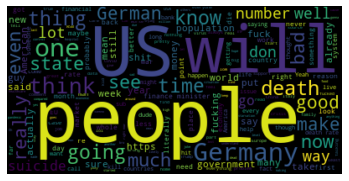

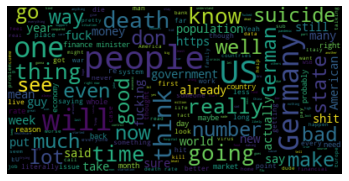

In [0]:
import os

from os import path
from wordcloud import WordCloud

t=""
for s in commentsData['body']:
  t=t+s
# Read the whole text.
text = t

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

# Generic Parser, Plug and Play Code:

In [0]:
class RedditScrapper():
    #c_id # Personal Use Script (14 char)
    #c_secret = ""           # Secret key (27 char)
    #u_a = ""               # App name
    #usrnm = ""      # Reddit username
    #passwd = ""     # Reddit login password
  def __init__(self,c_id,c_secret,u_a,usrnm,passwd):
    self.reddit = praw.Reddit(client_id = c_id, 
                         client_secret = c_secret, 
                         user_agent = u_a, 
                         username = usrnm, 
                         password = passwd)
    self.commentColumns=['total_awards_received', 'approved_at_utc', 'author_flair_template_id', 'likes', 
                         'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 
                         'no_follow', 'author', 'score', 'author_fullname', 'report_reasons', 'approved_by', 
                         'all_awardings', 'subreddit_id', 'body', 'edited', 'author_flair_css_class', 
                         'is_submitter', 'downs', 'author_flair_richtext', 'subreddit', 
                         'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 
                         'locked', 'name', 'created', 'author_flair_text', 'collapsed', 'created_utc', 
                         'subreddit_name_prefixed', 'controversiality']
  
  """ Subrredit Name: The Name of subreddit to parse
      Topk: TopK posts in the subrredit to parse
      timeHorizon: topK in what timehorizon, can be month,day,year

      Returns you the flattern nested comments from the topK Posts in
      a dataframe for further processing
  """
  def getTopPostsForSubReddit(self,subredditName,topK,timeHorizon):
    subbreddit=reddit.subreddit(subredditName)
    topPosts=subbreddit.top(limit=topK,time_filter=timeHorizon)
    totalPosts=0
    totalComments=0
    badData=0
    commentsData=pd.DataFrame(columns=commentColumns)
    for post in topPosts:
      totalPosts=totalPosts+1
      print("POST TITTLE")
      print(post.title)
      post.comments.replace_more(limit=None)
      title=post.title
      for comment in post.comments.list():
        try:
          if(type(comment) == praw.models.reddit.comment.Comment):
              totalComments=totalComments+1
              tempList=[getattr(comment,j.strip()) for j in commentColumns] +[title]
              commentsData=commentsData.append(pd.DataFrame([tempList], columns = commentColumns+ ['Title']))
        except:
          badData=badData+1
          
            
    print("Total Posts parsed", totalPosts)
    print("TotalComments Parse across Posts", totalComments)
    print("Deserialization Failed for some Object. Dirty Data etc", badData) 
    return commentsData  

  ## Visualize Word Frequency
  def visualizeWordFreq(self,text):
    import os
    from os import path
    from wordcloud import WordCloud

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return;
    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()
  
  ## Converts dataframe column to full Text
  def convertToFullText(self,df,column):
    t=""
    for s in df[column]:
      t=t+s
    # Read the whole text.
    text = t
    return text;

In [0]:
c_id = ""               # Personal Use Script (14 char)
c_secret = ""           # Secret key (27 char)
u_a = ""               # App name
usrnm = ""      # Reddit username
passwd = ""     # Reddit login password

scraper=RedditScrapper(c_id,c_secret,u_a,usrnm,passwd)

POST TITTLE
Columbia Sportswear employees to receive regular pay as CEO cuts own salary to $10,000


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


POST TITTLE
I started to collect news articles connected to the virus, and categorize them by date, to see, how did this whole thing evolve. The website is not finished, but you are alredy able to read news from january/february 2020.
POST TITTLE
‘We’re supposed to be a first-world country’: Doctor leaks video from packed ward of New York hospital amid coronavirus surge | Footage shows Queens hospital crammed with ICU patients as staff run out of ventilators
Total Posts parsed 3
TotalComments Parse across Posts 5944
Deserialization Failed for some Object. Dirty Data etc 176


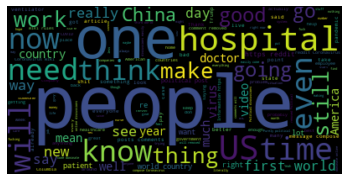

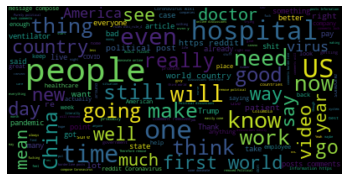

In [0]:
data=scraper.getTopPostsForSubReddit('Coronavirus',3,'day')
text=scraper.convertToFullText(data,'body')
scraper.visualizeWordFreq(text)


In [0]:
commentsData

,Title,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,banned_at_utc,body,collapsed,controversiality,created,created_utc,downs,edited,gilded,id,is_submitter,likes,locked,mod_reason_title,name,no_follow,num_reports,permalink,report_reasons,saved,score,score_hidden,subreddit,subreddit_id,subreddit_name_prefixed,total_awards_received,user_reports
0,German state finance minister committed suicide.,[],None,None,False,Devianted90,None,[],None,None,None,t2_4nmq04fq,None,He was a STATE finance minister. The state of ...,False,0,1.585521e+09,1.585492e+09,0,False,0,fltzog6,False,None,False,None,t1_fltzog6,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,3166,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,changechange1,None,[],None,None,None,t2_14c9i2j,None,Tragic. Left behind a wife and 2 kids. Rip bro x,False,0,1.585513e+09,1.585484e+09,0,False,0,fltqspo,False,None,False,None,t1_fltqspo,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,4573,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,fufm,None,[],None,None,None,t2_xmdqk,None,Jesus...hope this isn’t the start of a trend,False,0,1.585513e+09,1.585484e+09,0,False,0,fltr3vf,False,None,False,None,t1_fltr3vf,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,2691,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,TheSocDoc,None,[],None,None,None,t2_1493wl,None,Is it really that bad? Holy fuck,False,0,1.585512e+09,1.585484e+09,0,False,0,fltqdgz,False,None,False,None,t1_fltqdgz,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1793,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,HolidayPotential8,None,[],None,None,None,t2_4mhh1mzw,None,Sad. I bet some of us feel this way when we lo...,False,0,1.585513e+09,1.585484e+09,0,False,0,fltr1dh,False,None,False,None,t1_fltr1dh,False,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,544,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,German state finance minister committed suicide.,[],None,None,False,armandhammr,None,"[{'e': 'text', 't': 'weak and alone'}]",None,weak and alone,dark,t2_5dwv4mr,None,"Cool story bro, me dumb. Me not know what anyt...",False,0,1.585541e+09,1.585512e+09,0,False,0,fluxm8c,False,None,False,None,t1_fluxm8c,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,bonemaster5000,None,[],None,None,None,t2_4w9w5gkz,None,Says the guy who has literally not given a sin...,False,0,1.585536e+09,1.585507e+09,0,False,0,flup3x0,False,None,False,None,t1_flup3x0,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,1,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,BoldIntrepid,None,[],None,None,None,t2_bzd8w,None,F,False,0,1.585524e+09,1.585496e+09,0,False,0,flu5gk3,False,None,False,None,t1_flu5gk3,True,None,/r/wallstreetbets/comments/fr4wd7/german_state...,None,False,2,False,wallstreetbets,t5_2th52,r/wallstreetbets,0,[]
0,German state finance minister committed suicide.,[],None,None,False,SwiFT808-,None,[],None,None,None,t2_2u3s8god,None,I cited two sources one being literal governme...,False,0,1.585536e+09,1.585508e+09,0,False,0,flupz3o,False,None,False,None,t1_flupz3o,True,None,/r/wallstreetbets/comments/fr4wd7/german_sta